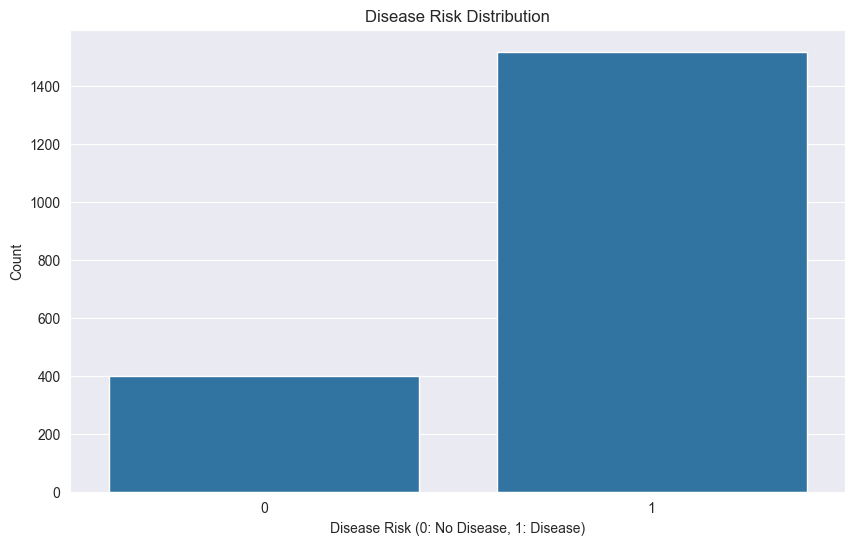

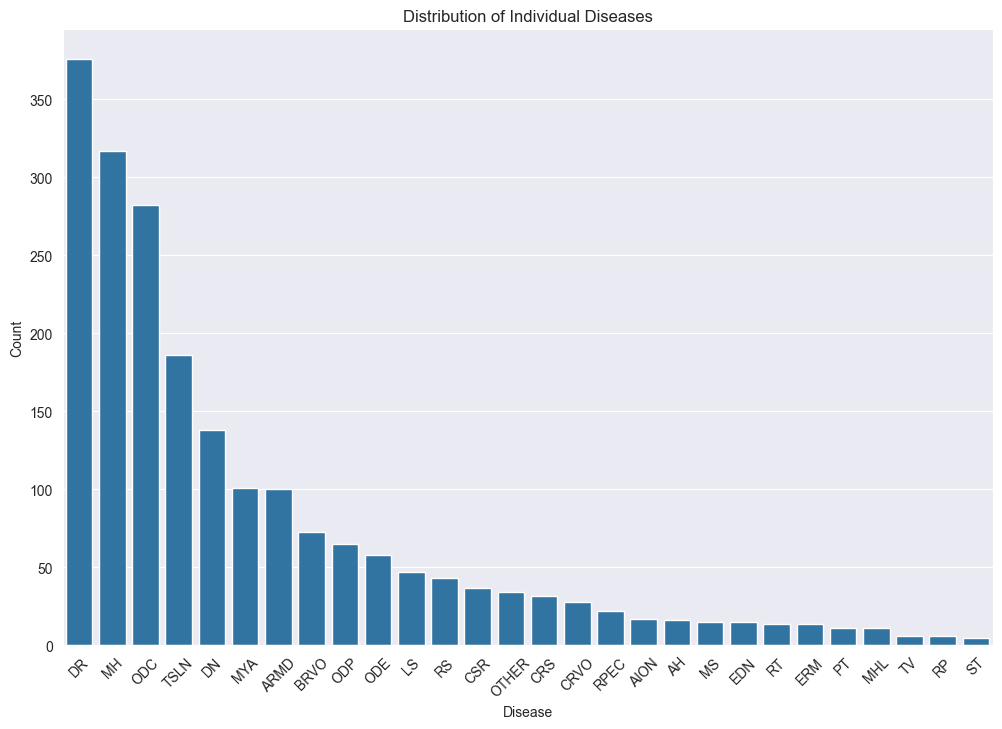

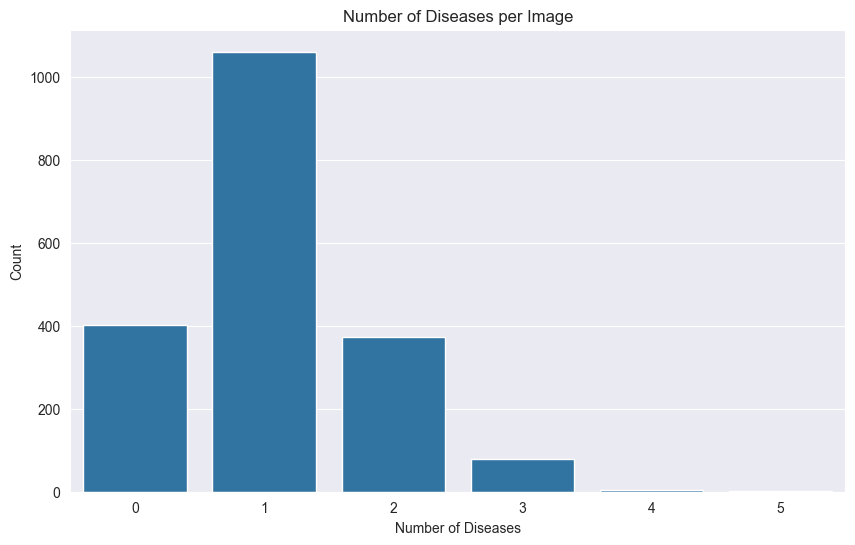

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_csv = "../data/train/RFMiD_Training_Labels.csv"
data = pd.read_csv(train_csv)

# Function to plot disease distribution
def plot_disease_distribution(df):
    # Disease risk distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Disease_Risk", data=df)
    plt.title("Disease Risk Distribution")
    plt.xlabel("Disease Risk (0: No Disease, 1: Disease)")
    plt.ylabel("Count")
    plt.show()

    # Individual disease distribution
    disease_cols = df.columns[2:]  # Skip ID and Disease_Risk
    disease_counts = df[disease_cols].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=disease_counts.index, y=disease_counts.values)
    plt.title("Distribution of Individual Diseases")
    plt.xlabel("Disease")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Function to analyze multi-label occurrences
def analyze_multilabel(df):
    disease_cols = df.columns[2:]
    df["num_diseases"] = df[disease_cols].sum(axis=1)

    # Count of number of diseases per patient
    plt.figure(figsize=(10, 6))
    sns.countplot(x="num_diseases", data=df)
    plt.title("Number of Diseases per Image")
    plt.xlabel("Number of Diseases")
    plt.ylabel("Count")
    plt.show()

# Execute analysis
plot_disease_distribution(data)
analyze_multilabel(data)


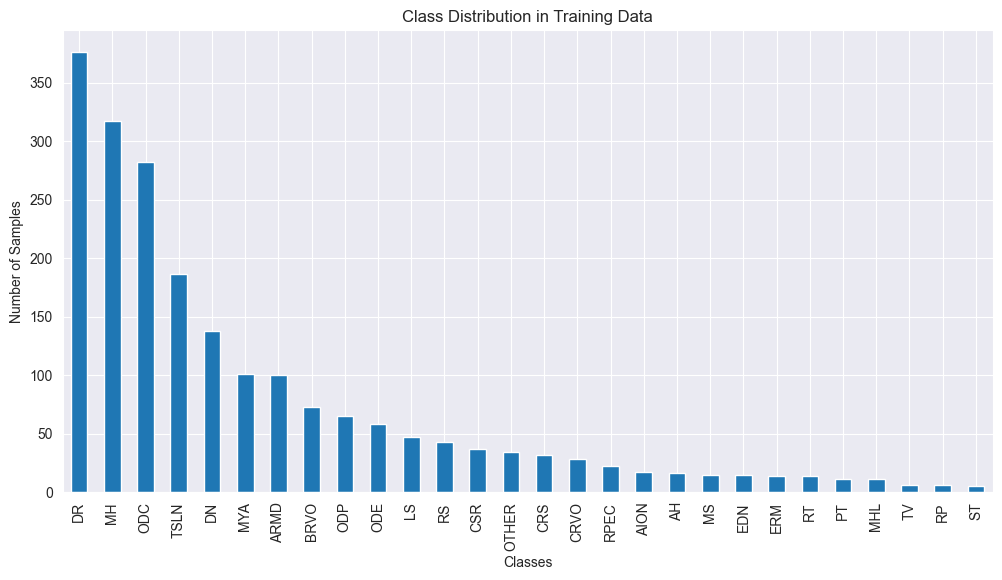

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_dir = "../data"  # Adjust this path based on your dataset directory
train_csv = f"{data_dir}/train/RFMiD_Training_Labels.csv"

# Read the training CSV
df = pd.read_csv(train_csv)

# Class labels (remove 'ID' and 'Disease_Risk' columns)
label_columns = df.columns[2:]

# Compute the class distribution
class_distribution = df[label_columns].sum().sort_values(ascending=False)

# Save class distribution for further use
class_distribution.to_csv("class_distribution.csv", index=True)

# Plot the class distribution
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar')
plt.title("Class Distribution in Training Data")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.savefig("class_distribution_plot.png")
plt.show()


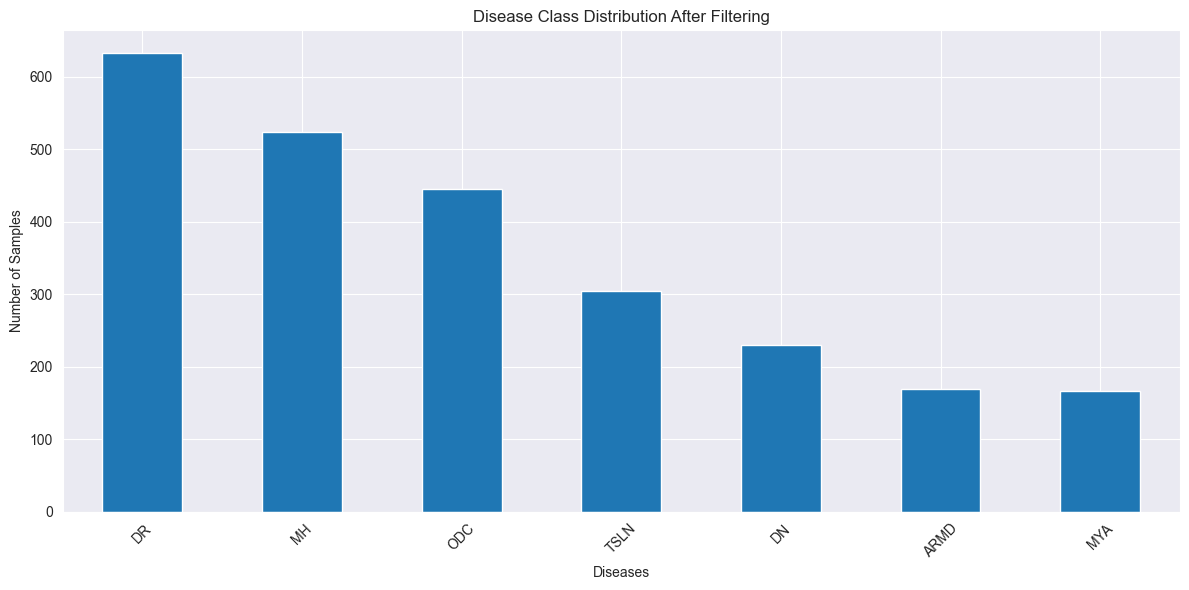

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to filtered CSV files
train_csv = "../data/train/RFMiD_Training_Labels_Filtered.csv"
val_csv = "../data/val/RFMiD_Validation_Labels_Filtered.csv"
test_csv = "../data/test/RFMiD_Testing_Labels_Filtered.csv"

# Load the datasets
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Combine datasets for overall visualization
label_columns = train_df.columns[2: ]  # Assuming first column is "ID"
train_counts = train_df[label_columns].sum()
val_counts = val_df[label_columns].sum()
test_counts = test_df[label_columns].sum()

# Combine counts from all datasets
total_counts = train_counts + val_counts + test_counts

# Plot the class distribution
plt.figure(figsize=(12, 6))
total_counts.sort_values(ascending=False).plot(kind="bar")
plt.title("Disease Class Distribution After Filtering")
plt.xlabel("Diseases")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
